In [3]:
# https://www.kaggle.com/c/aerial-cactus-identification/data

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv("aerial-cactus-identification/train.csv")
train_df

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1
...,...,...
17495,ffede47a74e47a5930f81c0b6896479e.jpg,0
17496,ffef6382a50d23251d4bc05519c91037.jpg,1
17497,fff059ecc91b30be5745e8b81111dc7b.jpg,1
17498,fff43acb3b7a23edcc4ae937be2b7522.jpg,0


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [4]:
model = Sequential()

In [5]:
input_shape = (32,32,3)

In [6]:
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape = input_shape))

In [7]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [8]:
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))

In [9]:
model.add(MaxPooling2D(pool_size= (2, 2)))

In [10]:
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))

In [11]:
model.add(MaxPooling2D(pool_size= (2, 2)))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(1024, activation="relu"))

In [15]:
model.add(Dense(256, activation="relu"))

In [16]:
model.add(Dense(2, activation="softmax"))

In [17]:
# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Prepare the data

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from shutil import copyfile, move

In [20]:
# Save the data in the required directories to follow ImageDataGenerator format
from os import mkdir
source_dir = "/home/local/SIRIONLABS/anshuman.tiwari1/ML_Projects/Cactus Keras/aerial-cactus-identification/train/"
dest_dir = "/home/local/SIRIONLABS/anshuman.tiwari1/ML_Projects/Cactus Keras/aerial-cactus-identification/train_data/"

mkdir(dest_dir)
mkdir(dest_dir + "true")
mkdir(dest_dir + "false")

with tqdm(total=len(list(train_df.iterrows()))) as pbar:
    for index, row in train_df.iterrows():
        pbar.update(1)
        if row["has_cactus"] == 1:
            copyfile(source_dir+row["id"], dest_dir + "true/" + row["id"])
        else:
            copyfile(source_dir+row["id"], dest_dir + "false/" + row["id"])

FileExistsError: [Errno 17] File exists: '/home/local/SIRIONLABS/anshuman.tiwari1/ML_Projects/Cactus Keras/aerial-cactus-identification/train_data/'

In [26]:
train_data_dir = "/home/local/SIRIONLABS/anshuman.tiwari1/ML_Projects/Cactus Keras/aerial-cactus-identification/train_data/"
train_image_data_generator = ImageDataGenerator(rescale=1. / 255, 
                                                horizontal_flip=True, 
                                                vertical_flip=True).flow_from_directory(train_data_dir, 
                                                                                        shuffle=True, 
                                                                                        target_size=(32,32),
                                                                                        batch_size = 64)



Found 17500 images belonging to 2 classes.


# Compile and train the model

In [27]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

In [28]:
metrics = model.fit_generator(train_image_data_generator, epochs=100, verbose=1, shuffle=True)

Epoch 1/100
185/274 [===================>..........] - ETA: 5s - loss: 0.3236 - accuracy: 0.8562

KeyboardInterrupt: 

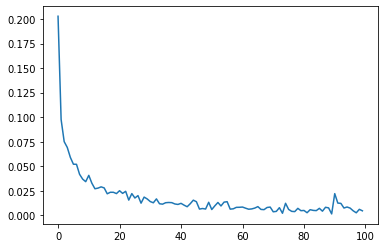

In [91]:
import matplotlib.pyplot as plt
plt.plot(metrics.history['loss'])
plt.show()

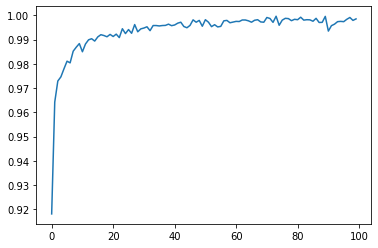

In [92]:
plt.plot(metrics.history['accuracy'])
plt.show()

In [103]:
test_folder = "/home/local/SIRIONLABS/anshuman.tiwari1/ML_Projects/Cactus Keras/aerial-cactus-identification/test_data/"

In [104]:
test_data_generator = ImageDataGenerator(rescale=1./255,
                                         horizontal_flip=True, 
                                         vertical_flip=True).flow_from_directory(test_folder, 
                                                                                 shuffle=False, 
                                                                                 target_size=(32,32),
                                                                                 batch_size = 1,
                                                                                class_mode="binary")

Found 4000 images belonging to 1 classes.


In [106]:
predictions = model.predict_generator(test_data_generator, verbose=1)

4000/4000 [==============================] - 12s 3ms/step


In [108]:
new_predictions = [0 if pred > 0.5 else 1 for pred in predictions]
new_predictions

[0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [112]:
test_data_generator.filenames

['test/000940378805c44108d287872b2f04ce.jpg',
 'test/0017242f54ececa4512b4d7937d1e21e.jpg',
 'test/001ee6d8564003107853118ab87df407.jpg',
 'test/002e175c3c1e060769475f52182583d0.jpg',
 'test/0036e44a7e8f7218e9bc7bf8137e4943.jpg',
 'test/0038ed6f7417b8275b393307f66cb1e3.jpg',
 'test/0059dfa41de4441fc23b9a4b98ba99cb.jpg',
 'test/0061bd302d735db829418cb90b4e6040.jpg',
 'test/00754573d8c7223e73da553dd43780bd.jpg',
 'test/008d9fce71c8e03a4c9cdd15ea908573.jpg',
 'test/00a36d4d6d152404670276fc983273bc.jpg',
 'test/00b706122b87e0fa275ff59e39d4d94b.jpg',
 'test/00c054da839d5518e59790f7d867f317.jpg',
 'test/00c88441b0510cdb3a6e9b3fa7b632af.jpg',
 'test/00e1e29865202c8ca715b0f14848d577.jpg',
 'test/00e20b0e6d779e7c36cea29710eed88e.jpg',
 'test/00feb0be23ac80f397a55b0ed8502def.jpg',
 'test/01185a1a81bb8041fa5e9c9ada9374eb.jpg',
 'test/0124398c0fcf6d1c92d9800337636b4e.jpg',
 'test/0127044dfc88dfaed0118c8764909800.jpg',
 'test/012c260033e652ab9690ea4bb3f63483.jpg',
 'test/0145b0da83f36fcfe1a13093551

In [119]:
cols = ["id", "has_cactus"]
submission_df = pd.DataFrame(columns=cols)

In [120]:
with tqdm(total=len(list(test_data_generator.filenames))) as pbar:
    for index, filename in enumerate(test_data_generator.filenames):
        pbar.update(1)
        submission_df = submission_df.append(pd.Series([filename.split('/')[-1], new_predictions[index]], index=cols),
                                             ignore_index=True)

100%|██████████| 4000/4000 [00:10<00:00, 393.63it/s]


In [121]:
submission_df.to_csv("")

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0
1,0017242f54ececa4512b4d7937d1e21e.jpg,0
2,001ee6d8564003107853118ab87df407.jpg,1
3,002e175c3c1e060769475f52182583d0.jpg,1
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0
...,...,...
3995,ffaafd0c9f2f0e73172848463bc2e523.jpg,0
3996,ffae37344310a1549162493237d25d3f.jpg,0
3997,ffbd469c56873d064326204aac546e0d.jpg,0
3998,ffcb76b7d47f29ece11c751e5f763f52.jpg,0
